# Rewards Shaping Experiment

This is to get an experiment along the straight track to validate 2 theories:

1. That we can shape rewards by addition vs. multiplication and it works
2. That we can make the car "brake" along arbitrary sections of track

In [1]:
# Load the track to exercise
from math import log
#Shapely Library
from shapely.geometry import Point, Polygon
from shapely.geometry.polygon import LinearRing, LineString
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline


Waypoints shape: (102, 6)
Centerline length: 19.55
Track bounds:  (0.6340445227146071, 0.6499684403961761, 8.843756283805801, 4.506008677214779)
[2.97312973 0.95872035 3.27853174 1.26251101 2.66700992 0.65613819]
Track width:  0.8611892581235783


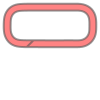

In [8]:

TRACK_NAME = 'Oval_track'

# Helper functions


# Visualize the Track and Waypoints

# Tracks Available::
# AWS_track                Straight_track                Oval_track
# Bowtie_track             H_track                       reinvent_base
# China_track              Mexico_track                  Canada_training

waypoints = np.load("tracks/%s.npy" % TRACK_NAME)
print("Waypoints shape: {}".format(waypoints.shape))

center_line = waypoints[:,0:2]
inner_border = waypoints[:,2:4]
outer_border = waypoints[:,4:6]
l_center_line = LineString(waypoints[:,0:2])
l_inner_border = LineString(waypoints[:,2:4])
l_outer_border = LineString(waypoints[:,4:6])
road_poly = Polygon(np.vstack((l_outer_border, np.flipud(l_inner_border))))

# Print some useful track analysis data
print("Centerline length: %0.2f" % l_center_line.length)
print("Track bounds: ", road_poly.bounds)
print(waypoints[0])
print("Track width: ", np.linalg.norm(waypoints[0,4:6] - waypoints[0,2:4]))
#print("Track y min/max: ", pd.DataFrame(outer_border)['y'])
road_poly

Text(6.516154120469764, 4.199300605337186, '50')

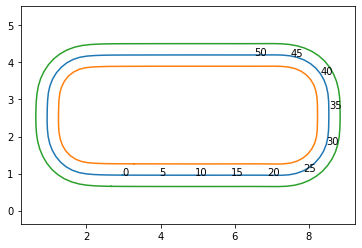

In [11]:
# scan the track and invoke the reward function for each waypoint

# Sections of Canada_Training
plt.plot(center_line[:,0:1], center_line[:,1:2])
plt.plot(inner_border[:,0:1], inner_border[:,1:2])
plt.plot(outer_border[:,0:1], outer_border[:,1:2])
plt.axis('equal')
plt.annotate('0', center_line[0])
plt.annotate('5', center_line[5])
plt.annotate('10', center_line[10])
plt.annotate('15', center_line[15])
plt.annotate('20', center_line[20])
plt.annotate('25', center_line[25])
plt.annotate('30', center_line[30])
plt.annotate('35', center_line[35])
plt.annotate('40', center_line[40])
plt.annotate('45', center_line[45])
plt.annotate('50', center_line[50])

In [12]:
START_BRAKING = 17
END_BRAKING = 25
BRAKE_SPEED = 1

""" Straight, please """
def reward_function(params):
    # No rewards shaping yet, just add a brake by track position
    if params['closest_waypoints'][0] >= START_BRAKING and params['closest_waypoints'][0] >= END_BRAKING and params['speed'] == BRAKE_SPEED:
        # BRAKE!
        reward = 1
    elif params['speed'] > BRAKE_SPEED:
        # Don't brake!
        reward = 1
    else:
        # You're doing it wrong!
        reward = 1e-3
    return reward